In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning - hr_data.csv')

## Quick Look & Data Preprocessing

Tahapan Pengerjaan
1. Download file Dataset (done)
2. Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat sesuai dengan skala ukur pada data) (done)
3. Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "PernahBekerja") (done)
4. Membuang data yang tidak diperlukan (Hint: Cari dan buang kolom yang memiliki satu unique value (konstanta)) (done)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [5]:
df.isnull().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

columns that have null data
1. 'SkorKepuasanPegawai'
2. 'JumlahKeikutsertaanProjek'
3. 'JumlahKeterlambatanSebulanTerakhir'
4. 'JumlahKetidakhadiran'
5. 'IkutProgramLOP'
6. 'AlasanResign'



In [6]:
# columns grouping
nums = ['SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','IkutProgramLOP']
cats = ['StatusPernikahan','JenisKelamin','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','HiringPlatform','TingkatPendidikan','AlasanResign','PernahBekerja']
date_time = ['TanggalLahir','TanggalHiring','TanggalPenilaianKaryawan','TanggalResign']
constant = ['Username','EnterpriseID','NomorHP','Email']

In [7]:
constant = ['Username','EnterpriseID','NomorHP','Email']
df['Username'].value_counts()

Username
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: count, Length: 285, dtype: int64

- for unique columns, supposed that 'constant' is a list of constant. Upon checking, there are 2 username which were used twice with different people. As such, no need to change as the column will be dropped.

In [8]:
boredEggs0 = df[(df['Username'] == 'boredEggs0')]
boredEggs0

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,NaN,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,NaN,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


In [9]:
brainyMagpie7 = df[(df['Username'] == 'brainyMagpie7')]
brainyMagpie7

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,...,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,NaN,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,...,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,NaN,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-


In [10]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01
33,madFerret4,106540,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,...,+6281222388xxx,madFerret4760@hotmail.com,Magister,1,NaN,masih_bekerja,1981-04-14,2014-9-30,2020-01-07,-
43,shamefulIguana0,101682,Lainnya,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Barat,Indeed,...,+6281210001xxx,shamefulIguana0780@yahoo.com,Magister,1,0.0,masih_bekerja,1967-06-05,2013-2-18,2020-1-14,-
134,grudgingMuesli6,106109,Lainnya,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Website,...,+6289724050xxx,grudgingMuesli6971@icloud.com,Sarjana,1,NaN,masih_bekerja,1988-12-27,2012-4-30,2020-1-29,-
85,finickyDunbird1,105678,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Barat,Google_Search,...,+6281290096xxx,finickyDunbird1042@icloud.com,Magister,1,NaN,apresiasi,1991-09-05,2011-04-04,2018-04-09,2020-2-25


In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print(df[col].value_counts().sum())
    print()

Value count kolom StatusPernikahan:
StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64
287

Value count kolom JenisKelamin:
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64
287

Value count kolom Pekerjaan:
Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2
Product Design (UX Researcher)      1
Software Architect                  1
Name: count, dtype: int64
287

Value count kolom JenjangKarir:
JenjangKarir
Freshgraduate_program    169
Mid_level                 70
Se

- For Status Pernikahan, retain 'lainnya' while putting those with dash into the same column.
- For HiringPlatform, 'On-line_Web_application' can be merged to website while usually it is the same thing.
- For PernahBekerja, it seems that only one 'yes' while others marked as '1'. will put all as 1 and it might be deleted as it is the same across all observation.
- For AlasanResign that has NA values, a new value 'lainnya' will be created.

### Missing Data

- all missing data is filled by median since mean would resulted in decimal.
- for 'IkutProgramLOP', filled with 0 as did not participate

In [12]:
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)


/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_16395/93561090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_16395/93561090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate 

In [13]:
df['IkutProgramLOP'].fillna(0, inplace=True)
df['AlasanResign'].fillna('lainnya', inplace=True)

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_16395/2172845048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IkutProgramLOP'].fillna(0, inplace=True)
/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_16395/2172845048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

### Irrelevant Values

In [14]:
df['StatusPernikahan'] = df['StatusPernikahan'].apply(lambda x: 'Lainnya' if x == '-' else x)
df['HiringPlatform'] = df['HiringPlatform'].apply(lambda x: 'Website' if x == 'On-line_Web_application' else x)
df['PernahBekerja'] = df['PernahBekerja'].apply(lambda x: 'yes' if x == '1' else x)

- change float data types to integer, for uniformity

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [16]:
df = df.astype({"SkorKepuasanPegawai": 'int', "JumlahKeikutsertaanProjek": 'int', 
                "JumlahKeterlambatanSebulanTerakhir": 'int', 
                "JumlahKetidakhadiran": 'int',
                "IkutProgramLOP": 'int'})

### Drop Constant

In [17]:
df = df.drop(columns=constant)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   StatusPernikahan                    287 non-null    object
 1   JenisKelamin                        287 non-null    object
 2   StatusKepegawaian                   287 non-null    object
 3   Pekerjaan                           287 non-null    object
 4   JenjangKarir                        287 non-null    object
 5   PerformancePegawai                  287 non-null    object
 6   AsalDaerah                          287 non-null    object
 7   HiringPlatform                      287 non-null    object
 8   SkorSurveyEngagement                287 non-null    int64 
 9   SkorKepuasanPegawai                 287 non-null    int64 
 10  JumlahKeikutsertaanProjek           287 non-null    int64 
 11  JumlahKeterlambatanSebulanTerakhir  287 non-null    int64 

## Annual Report on Employee Number Changes

Tahapan Pengerjaan

1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign (Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign) (menggunakan function karena ada nilai '-', done)
2. Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh (Hint: Gunakan outer join agar tahun di hiring dan resign dapat bersatu) (done)
3. Lakukan imputation pada data tahun yang kosong sesuai urutan (Hint: Gunakan fillna) (diisi dengan 0, done)
4. Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua (2) (Hint: Untuk perubahan, hitung dari total karyawan yang ada - total karyawan yang resign di setiap tahunnya) 
5. Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada (Hint: Perhatikan jenis plot yang digunakan) 
6. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Jelaskan kondisi perusahaan apakah sedang sehat / mengkhawatirkan berdasarkan jumlah karyawan tahunan)

In [19]:
def safe_year_from_date(date_str):
    if pd.isnull(date_str) or date_str == '-':
        return None
    try:
        return pd.to_datetime(date_str).year
    except:
        return None

df['YearHiring'] = df['TanggalHiring'].apply(safe_year_from_date)
df['YearResign'] = df['TanggalResign'].apply(safe_year_from_date)

In [20]:
hiring_counts = df['YearHiring'].value_counts().sort_index().reset_index()
hiring_counts.columns = ['Year','HiredCount']
hiring_counts

,Year,HiredCount
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [21]:
resign_counts = df['YearResign'].value_counts().sort_index().reset_index()
resign_counts.columns = ['Year','ResignedCount']
resign_counts

,Year,ResignedCount
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [22]:
df_hiringresign = pd.merge(hiring_counts, resign_counts, on='Year', how='outer')

In [23]:
df_hiringresign = df_hiringresign.sort_values('Year').fillna(0)

In [24]:
df_hiringresign['TotalHired'] = df_hiringresign['HiredCount'].cumsum()
df_hiringresign['TotalResigned'] = df_hiringresign['ResignedCount'].cumsum()
df_hiringresign['CurrentEmployees'] = df_hiringresign['TotalHired'] - df_hiringresign['TotalResigned']
df_hiringresign['YearlyChange'] = df_hiringresign['HiredCount'] - df_hiringresign['ResignedCount']

In [25]:
df_hiringresign

,Year,HiredCount,ResignedCount,TotalHired,TotalResigned,CurrentEmployees,YearlyChange
0,2006.0,1.0,0.0,1.0,0.0,1.0,1.0
1,2007.0,2.0,0.0,3.0,0.0,3.0,2.0
2,2008.0,2.0,0.0,5.0,0.0,5.0,2.0
3,2009.0,7.0,0.0,12.0,0.0,12.0,7.0
4,2010.0,8.0,0.0,20.0,0.0,20.0,8.0
5,2011.0,76.0,0.0,96.0,0.0,96.0,76.0
6,2012.0,41.0,0.0,137.0,0.0,137.0,41.0
7,2013.0,43.0,5.0,180.0,5.0,175.0,38.0
8,2014.0,56.0,12.0,236.0,17.0,219.0,44.0
9,2015.0,31.0,8.0,267.0,25.0,242.0,23.0


/Users/sailafs/anaconda3/lib/python3.11/site-packages/waterfall_chart.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop] + row['amount']
/Users/sailafs/anaconda3/lib/python3.11/site-packages/waterfall_chart.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop]


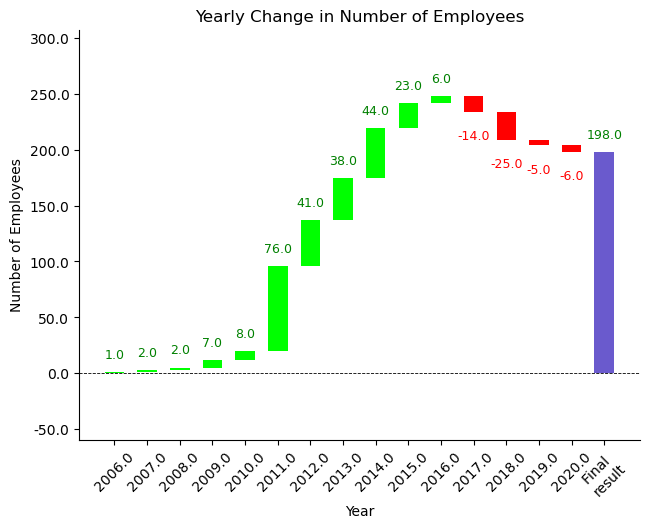

In [26]:
import waterfall_chart

waterfall_chart.plot(df_hiringresign['Year'], df_hiringresign['YearlyChange'], 
                     rotation_value=0,                      
                     net_label='Final \nresult',
                     blue_color='slateblue', 
                     green_color='lime', 
                     red_color='red')
plt.title('Yearly Change in Number of Employees')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Employees')
sns.despine()
plt.show()

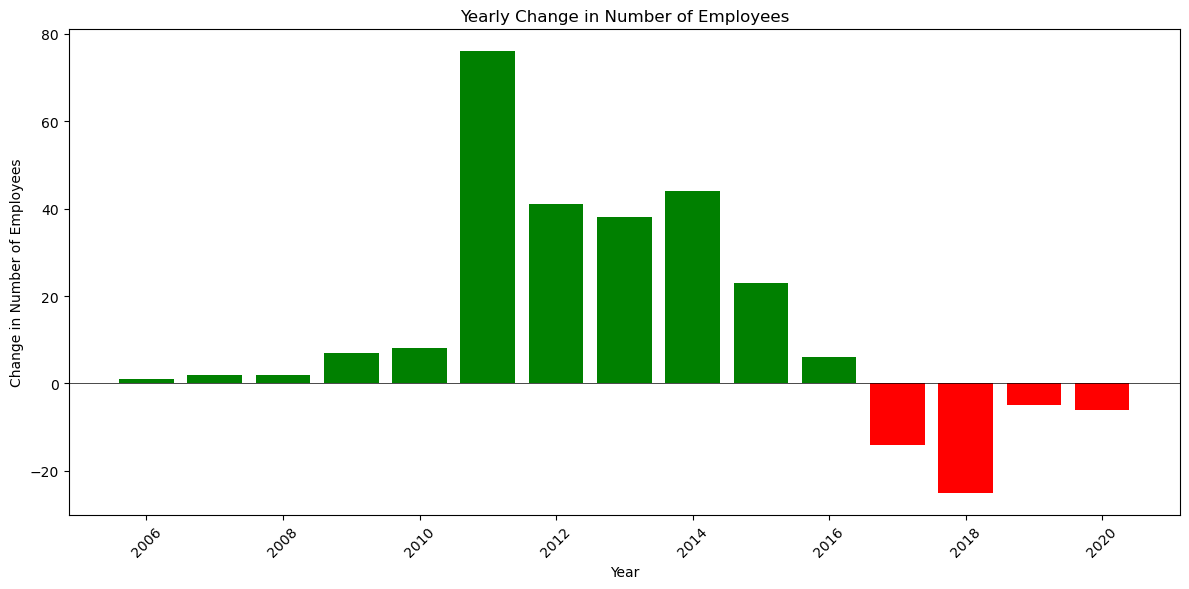

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(df_hiringresign['Year'], df_hiringresign['YearlyChange'], color=['g' if x >= 0 else 'r' for x in df_hiringresign['YearlyChange']])
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.title('Yearly Change in Number of Employees')
plt.xlabel('Year')
plt.ylabel('Change in Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Resign Reason Analysis for Employee Attrition Management Strategy

Tahapan Pengerjaan

1. Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign (Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum) (done)

2. Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan (Hint: Gunakan outer join) (done)

3. Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign) (Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee) (done)

4. Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya (Hint: Perhatikan jenis plot yang digunakan) (done)

5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat) (done)

6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya (Hint: Perhatikan jenis plot yang digunakan) (done)

7. Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan apa yang menyebabkan divisi tersebut banyak yang resign, langkah apa yang perlu dilakukan manajemen agar tidak terjadi lagi hal yang seperti itu)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 287 non-null    int64  
 10  JumlahKeikutsertaanProjek           287 non-null    int64  
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [29]:
df_resigned = df[df['TanggalResign'] != '-']
df_current = df[df['TanggalResign'] == '-']
resigned_by_job = df_resigned.groupby('Pekerjaan').size().reset_index(name='Count')
resigned_by_job = resigned_by_job.sort_values('Count',ascending=True)
current_by_job = df_current.groupby('Pekerjaan').size().reset_index(name='Count')
current_by_job = current_by_job.sort_values('Count',ascending=True)


In [30]:
merged_by_job = pd.merge(resigned_by_job, current_by_job,on='Pekerjaan', how='outer')
merged_by_job.columns = ['Pekerjaan','CountResigned','CountCurrent']
merged_by_job['CountResigned'] = merged_by_job['CountResigned'].fillna(0)

In [31]:
merged_by_job['TotalEmployees'] = merged_by_job['CountResigned'] + merged_by_job['CountCurrent']
merged_by_job['PercentageCurrent'] = (merged_by_job['CountCurrent']/merged_by_job['TotalEmployees'])*100
merged_by_job['PercentageResigned'] = (merged_by_job['CountResigned']/merged_by_job['TotalEmployees'])*100
merged_by_job = merged_by_job.sort_values('PercentageCurrent',ascending=True)
merged_by_job

,Pekerjaan,CountResigned,CountCurrent,TotalEmployees,PercentageCurrent,PercentageResigned
0,Data Analyst,8.0,8,16.0,50.000000,50.000000
12,Software Engineer (Front End),28.0,44,72.0,61.111111,38.888889
5,Product Design (UI & UX),9.0,15,24.0,62.500000,37.500000
7,Product Manager,6.0,11,17.0,64.705882,35.294118
1,Data Engineer,3.0,7,10.0,70.000000,30.000000
10,Software Engineer (Android),7.0,17,24.0,70.833333,29.166667
11,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073
2,DevOps Engineer,0.0,3,3.0,100.000000,0.000000
3,Digital Product Manager,0.0,2,2.0,100.000000,0.000000
4,Machine Learning Engineer,0.0,2,2.0,100.000000,0.000000


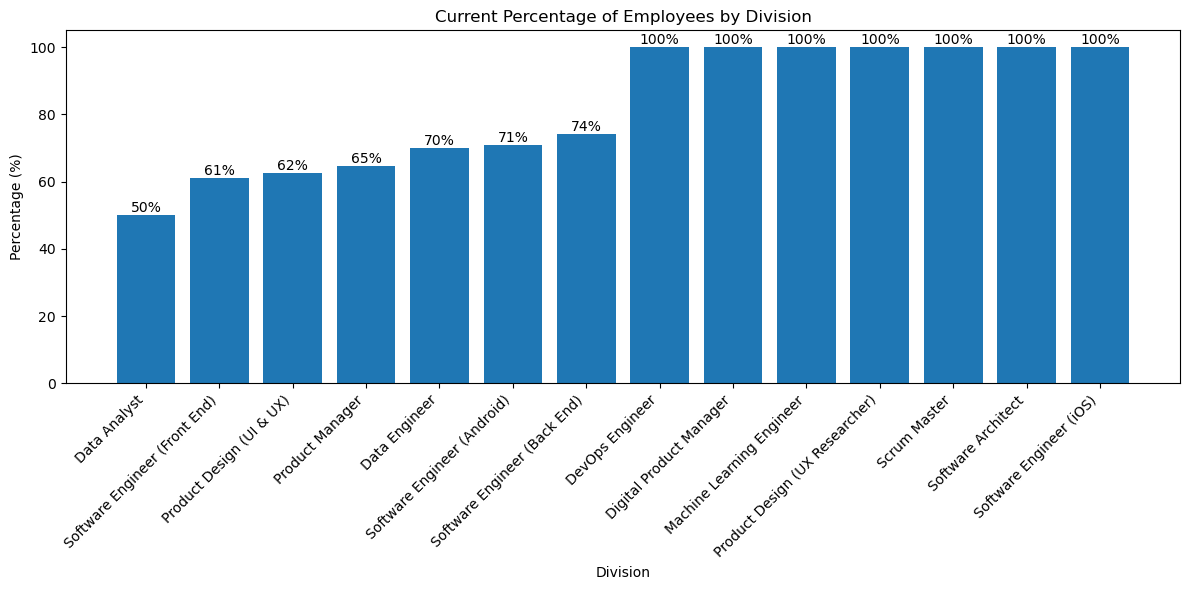

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(merged_by_job['Pekerjaan'], merged_by_job['PercentageCurrent'])

plt.title('Current Percentage of Employees by Division')
plt.xlabel('Division')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{round(height)}%',
            ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

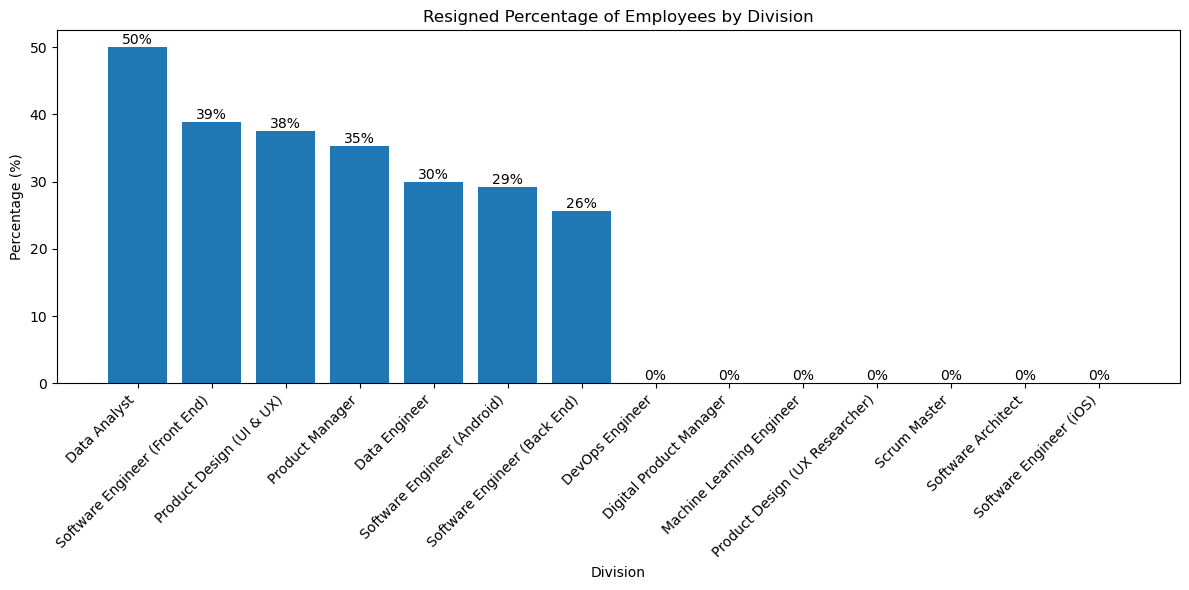

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(merged_by_job['Pekerjaan'], merged_by_job['PercentageResigned'])

plt.title('Resigned Percentage of Employees by Division')
plt.xlabel('Division')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{round(height)}%',
            ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

- Data Analyst is seen to be having the highest turnover, further analysis is required.

In [34]:
df_resigned_data_analyst = df_resigned[df_resigned['Pekerjaan'] == 'Data Analyst']
df_resigned_data_analyst

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,YearHiring,YearResign
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,...,Sarjana,yes,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,2014,2018.0
18,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4,...,Sarjana,yes,1,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,2012,2017.0
86,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5,...,Sarjana,yes,0,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-3-15,2016,2017.0
102,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,3,3,...,Sarjana,yes,0,toxic_culture,1984-05-09,2012-04-02,2014-2-20,2018-06-08,2012,2018.0
106,Lainnya,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,4,3,...,Sarjana,yes,0,toxic_culture,1987-01-07,2013-01-07,2020-1-30,2014-8-19,2013,2014.0
108,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4,...,Sarjana,yes,0,toxic_culture,1976-09-22,2015-3-30,2020-1-21,2014-8-19,2015,2014.0
233,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,4,3,...,Magister,yes,0,toxic_culture,1970-02-11,2009-07-06,2020-1-25,2015-06-05,2009,2015.0
239,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,4,4,...,Magister,yes,0,internal_conflict,1989-09-08,2011-07-11,2017-02-01,2017-6-25,2011,2017.0


5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat)

In [35]:
df_resigned_data_analyst_agg = df_resigned_data_analyst.groupby(['JenjangKarir', 'PerformancePegawai','AlasanResign']).size().reset_index(name='Count')
df_resigned_data_analyst_agg = df_resigned_data_analyst_agg.sort_values('Count', ascending=False)
df_resigned_data_analyst_agg = df_resigned_data_analyst_agg.replace(['Freshgraduate_program','Sangat_bagus','Sangat_kurang','toxic_culture','internal_conflict'],
           ['Freshgraduate','Sangat bagus','Sangat kurang','toxic culture','internal conflict'])
df_resigned_data_analyst_agg

,JenjangKarir,PerformancePegawai,AlasanResign,Count
4,Freshgraduate,Sangat bagus,toxic culture,3
0,Freshgraduate,Bagus,toxic culture,1
1,Freshgraduate,Biasa,internal conflict,1
2,Freshgraduate,Biasa,toxic culture,1
3,Freshgraduate,Sangat bagus,internal conflict,1
5,Freshgraduate,Sangat kurang,toxic culture,1


In [36]:
import plotly.express as px

fig = px.sunburst(df_resigned_data_analyst_agg, path=['JenjangKarir', 'PerformancePegawai','AlasanResign'], values='Count')
fig.update_layout(
    title="Resignation Reason of Data Analysts",
    title_x=0.5,  # Center the title horizontally
    title_yref="container",  # Reference the container holding the plot
    title_y=0.95  # Position the title slightly above the plot
)
fig.show()

## Build an Automated Resignation Behavior Prediction using Machine Learning

Tahapan Pengerjaan

1. Melakukan check kembali kepada tahap data preprocessing yang dilakukan pada tugas 1, mulai dari mendeteksi ada tidaknya missing value pada baris dan kolom, deteksi data duplikat, menanggulangi pencilan pada data, transformasi pada data seperti categorical encoding, melakukan feature engineering, dan feature selection berdasarkan domain expertise. 

(Hint: Perhatikan fitur-fitur yang sekiranya perlu ditransformasi, jumlah fitur yang direkomendasikan akhir yang direkomendasikan tidak melebihi 40, membuang fitur-fitur yang sekiranya tidak bermakna secara dunia nyata terhadap model.) 

2. Melakukan data split pada train dan testing, serta menyeimbangkan proporsi data training pada target yang ada (imbalanced learning). 

(Hint: Cari metode yang paling cocok untuk menyeimbangkan proporsi data training (berdasarkan variable target) agar model nantinya tidak bersifat diskriminatif) 

3. Latihlah model dengan berbagai algoritma ML yang ada, tentukan ML metrics yang sekiranya berkaitan dengan tujuan bisnis untuk menjadi benchmark pada ML model selection. 

(Hint: Perhatikan jenis metrics yang ada, lakukan training pada data yang sudah dilakukan imbalanced learning) 

4. Pilih ML model terbaik, kemudian lakukan hyperparameter tuning agar meningkatkan performa ML. Gunakan metode pipeline dan cross-validation agar menghasilkan model yang berkualitas 

(Hint: Perhatikan hyperparameter yang ada pada model terbaik, lakukan tuning yang) 

5. Tampilkan visualisasi dari ML metrics yang diukur, tunjukan pula bahwa ML tidak bersifat diskriminatif ketika melakukan prediksi target. 

(Hint: Tampilkan visualisasi seperti confusion matrix, ROC plot, atau yang lainnya)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   AsalDaerah                          287 non-null    object 
 7   HiringPlatform                      287 non-null    object 
 8   SkorSurveyEngagement                287 non-null    int64  
 9   SkorKepuasanPegawai                 287 non-null    int64  
 10  JumlahKeikutsertaanProjek           287 non-null    int64  
 11  JumlahKeterlambatanSebulanTerakhir  287 non-n

In [38]:
# New feature 'Resign' from 'YearResign' to be changed to Yes == 0 and No == 1 as target feature
df['Resign'] = np.where(df['YearResign'].isna(), 1, 0)
df['Resign'].value_counts()

Resign
1    198
0     89
Name: count, dtype: int64

In [39]:
 # 0 == tidak ikut/No, 1 == ikut/Yes
df['IkutProgramLOP'] = df['IkutProgramLOP'].replace([1,0],['Yes', 'No'])
df['IkutProgramLOP'].value_counts()

IkutProgramLOP
No     272
Yes     15
Name: count, dtype: int64

In [40]:
numerical_features = ['SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran','YearHiring']

In [41]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = remove_outliers_iqr(df, numerical_features)

- handling outlier makes it lost significant data, might not be a good path.

In [42]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print(df[col].value_counts().sum())
    print()

Value count kolom StatusPernikahan:
StatusPernikahan
Belum_menikah    85
Menikah          41
Lainnya          38
Bercerai         30
Name: count, dtype: int64
194

Value count kolom JenisKelamin:
JenisKelamin
Wanita    123
Pria       71
Name: count, dtype: int64
194

Value count kolom StatusKepegawaian:
StatusKepegawaian
FullTime      149
Outsource      42
Internship      3
Name: count, dtype: int64
194

Value count kolom Pekerjaan:
Pekerjaan
Software Engineer (Back End)      76
Software Engineer (Front End)     44
Software Engineer (Android)       18
Product Design (UI & UX)          18
Product Manager                   12
Data Analyst                      12
Data Engineer                      6
Scrum Master                       3
Digital Product Manager            2
Product Design (UX Researcher)     1
Software Architect                 1
Machine Learning Engineer          1
Name: count, dtype: int64
194

Value count kolom JenjangKarir:
JenjangKarir
Freshgraduate_program    112
Mid_

In [43]:
# Convert date columns to datetime
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'].replace('-', pd.NaT))
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])

# Set end date
end_date = pd.Timestamp('2021-01-01')

In [44]:
# one hot encoding (low cardinality)
ohe_features = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'JenjangKarir','PerformancePegawai', 'TingkatPendidikan', 'IkutProgramLOP','TingkatPendidikan']
df_ohe = pd.get_dummies(df[ohe_features], dtype = int)

In [45]:
# label encoding (high cardinality)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_features = ['Pekerjaan', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'AlasanResign']

for feature in le_features:
    df[f'{feature}_encoded'] = le.fit_transform(df[feature])

In [46]:
# feature engineering

df['TanggalResign'] = df['TanggalResign'].fillna(end_date) 

df['AgeHiring'] = (df['TanggalHiring'] - df['TanggalLahir'].dt.floor('D')).dt.days.astype(float) / 365
df['TenureMonths'] = ((df['TanggalResign'] - df['TanggalHiring']).dt.days / 30).astype(int)
df['MonthsSinceLastEvaluation'] = ((end_date - df['TanggalPenilaianKaryawan']).dt.days / 30).astype(int)
df['ProductivityScore'] = df['JumlahKeikutsertaanProjek'] / (df['JumlahKeterlambatanSebulanTerakhir'] + df['JumlahKetidakhadiran'] + 1)


In [47]:
df['AgeHiring'] = df['AgeHiring'].astype(int)

In [48]:
numerical_features = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 
                      'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']


In [49]:
final_features = list(df_ohe.columns) + [f'{f}_encoded' for f in le_features] + numerical_features + ['AgeHiring', 'TenureMonths', 'MonthsSinceLastEvaluation', 'ProductivityScore', 'Resign']

In [50]:
# First, let's check the existing columns in both DataFrames
print("Columns in df:")
print(df.columns.tolist())

print("\nColumns in df_ohe:")
print(df_ohe.columns.tolist())

print("\nColumns in final_features:")
print(final_features)

# Find missing columns
missing_columns = set(final_features) - set(df.columns)
print("\nMissing columns:")
print(missing_columns)

Columns in df:
['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'TingkatPendidikan', 'PernahBekerja', 'IkutProgramLOP', 'AlasanResign', 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign', 'YearHiring', 'YearResign', 'Resign', 'Pekerjaan_encoded', 'PerformancePegawai_encoded', 'AsalDaerah_encoded', 'HiringPlatform_encoded', 'TingkatPendidikan_encoded', 'AlasanResign_encoded', 'AgeHiring', 'TenureMonths', 'MonthsSinceLastEvaluation', 'ProductivityScore']

Columns in df_ohe:
['StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai', 'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah', 'JenisKelamin_Pria', 'JenisKelamin_Wanita', 'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship', 'StatusKepegawaian_Outsource', 'JenjangKa

In [51]:
# Check if these missing columns exist in df_ohe
missing_in_ohe = missing_columns - set(df_ohe.columns)
print("\nColumns missing from both df and df_ohe:")
print(missing_in_ohe)


Columns missing from both df and df_ohe:
set()


In [52]:
# Create the final DataFrame
existing_columns = [col for col in final_features if col in df.columns]
df_final = pd.concat([df_ohe, df[existing_columns]], axis=1)

print("\nColumns in the final DataFrame:")
print(df_final.columns.tolist())


Columns in the final DataFrame:
['StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai', 'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah', 'JenisKelamin_Pria', 'JenisKelamin_Wanita', 'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship', 'StatusKepegawaian_Outsource', 'JenjangKarir_Freshgraduate_program', 'JenjangKarir_Mid_level', 'JenjangKarir_Senior_level', 'PerformancePegawai_Bagus', 'PerformancePegawai_Biasa', 'PerformancePegawai_Kurang', 'PerformancePegawai_Sangat_bagus', 'PerformancePegawai_Sangat_kurang', 'TingkatPendidikan_Doktor', 'TingkatPendidikan_Magister', 'TingkatPendidikan_Sarjana', 'IkutProgramLOP_No', 'IkutProgramLOP_Yes', 'TingkatPendidikan_Doktor', 'TingkatPendidikan_Magister', 'TingkatPendidikan_Sarjana', 'Pekerjaan_encoded', 'PerformancePegawai_encoded', 'AsalDaerah_encoded', 'HiringPlatform_encoded', 'TingkatPendidikan_encoded', 'AlasanResign_encoded', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlamb

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 286
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan_Belum_menikah      194 non-null    int64  
 1   StatusPernikahan_Bercerai           194 non-null    int64  
 2   StatusPernikahan_Lainnya            194 non-null    int64  
 3   StatusPernikahan_Menikah            194 non-null    int64  
 4   JenisKelamin_Pria                   194 non-null    int64  
 5   JenisKelamin_Wanita                 194 non-null    int64  
 6   StatusKepegawaian_FullTime          194 non-null    int64  
 7   StatusKepegawaian_Internship        194 non-null    int64  
 8   StatusKepegawaian_Outsource         194 non-null    int64  
 9   JenjangKarir_Freshgraduate_program  194 non-null    int64  
 10  JenjangKarir_Mid_level              194 non-null    int64  
 11  JenjangKarir_Senior_level           194 non-null  

In [54]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 286
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan_Belum_menikah      194 non-null    int64  
 1   StatusPernikahan_Bercerai           194 non-null    int64  
 2   StatusPernikahan_Lainnya            194 non-null    int64  
 3   StatusPernikahan_Menikah            194 non-null    int64  
 4   JenisKelamin_Pria                   194 non-null    int64  
 5   JenisKelamin_Wanita                 194 non-null    int64  
 6   StatusKepegawaian_FullTime          194 non-null    int64  
 7   StatusKepegawaian_Internship        194 non-null    int64  
 8   StatusKepegawaian_Outsource         194 non-null    int64  
 9   JenjangKarir_Freshgraduate_program  194 non-null    int64  
 10  JenjangKarir_Mid_level              194 non-null    int64  
 11  JenjangKarir_Senior_level           194 non-null  

In [56]:
df_final_metrics = pd.DataFrame(df_final.describe())
df_final_metrics

,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Lainnya,StatusPernikahan_Menikah,JenisKelamin_Pria,JenisKelamin_Wanita,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,JenjangKarir_Freshgraduate_program,...,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,AgeHiring,TenureMonths,MonthsSinceLastEvaluation,ProductivityScore,Resign
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.0,194.0,194.000000,194.000000,194.000000,194.000000,194.0,194.000000
mean,0.438144,0.154639,0.195876,0.211340,0.365979,0.634021,0.768041,0.015464,0.216495,0.577320,...,3.262887,4.000000,0.0,0.0,10.298969,33.850515,85.072165,28.912371,0.0,0.701031
std,0.497443,0.362496,0.397901,0.409315,0.482950,0.482950,0.423175,0.123708,0.412921,0.495264,...,0.658121,0.801553,0.0,0.0,5.817902,9.237978,32.228539,28.870580,0.0,0.458991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,0.0,0.0,1.000000,19.000000,-7.000000,10.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,0.0,0.0,5.000000,27.000000,71.000000,11.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,3.000000,4.000000,0.0,0.0,10.000000,32.500000,88.000000,11.000000,0.0,1.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,4.000000,5.000000,0.0,0.0,15.000000,39.000000,109.000000,46.750000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,5.000000,0.0,0.0,20.000000,63.000000,164.000000,115.000000,0.0,1.000000


In [57]:
# split data

X = df_final.drop('Resign', axis=1)
y = df_final['Resign']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Target Distribution before SMOTE")
print(y_train.value_counts())

Target Distribution before SMOTE
Resign
1    111
0     44
Name: count, dtype: int64


In [59]:
print('Train Dimension:',X_train.shape)
print('Test Dimension:',X_test.shape)

Train Dimension: (155, 37)
Test Dimension: (39, 37)


In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Target Distribution after SMOTE")
print(y_train.value_counts())  # This will likely show a more balanced distribution

Target Distribution after SMOTE
Resign
1    111
0    111
Name: count, dtype: int64


### Modeling

In [61]:
import warnings
warnings.filterwarnings('ignore')

#### Define Function

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    score = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('accuracy (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

#### Model 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

eval_classification(logreg)

Accuracy (Test Set): 0.77
Accuracy (Train Set): 0.92
Precision (Test Set): 0.79
Recall (Test Set): 0.88
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.98
accuracy (crossval train): 0.9098097601323408
accuracy (crossval test): 0.8400809716599189


In [64]:
from sklearn.tree import DecisionTreeClassifier
dtw = DecisionTreeClassifier()
dtw.fit(X_train, y_train)
y_pred_dt = dtw.predict(X_test)

eval_classification(dtw)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 0.92
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00
accuracy (crossval train): 1.0
accuracy (crossval test): 0.9688259109311741


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, classification_report
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

eval_classification(rf)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Test Set): 1.00
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
accuracy (crossval train): 1.0
accuracy (crossval test): 0.9434547908232117


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

eval_classification(knn)

Accuracy (Test Set): 0.74
Accuracy (Train Set): 0.83
Precision (Test Set): 0.78
Recall (Test Set): 0.84
F1-Score (Test Set): 0.81
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.92
accuracy (crossval train): 0.7190653432588917
accuracy (crossval test): 0.7164642375168692


- highest accuracy is RandomForest

#### Decision Tree Hyperparameter

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

print(model.best_params_)
print(model.best_score_)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.97
Precision (Test Set): 0.92
Recall (Test Set): 0.88
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
accuracy (crossval train): 0.9330107526881722
accuracy (crossval test): 0.7887989203778678
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.9044152522669148


param value: 1; train: 0.9900576251927603; test: 0.6771428571428572
param value: 2; train: 0.9961447934420907; test: 0.92
param value: 3; train: 0.9993912831750669; test: 0.9028571428571429
param value: 4; train: 0.9999188377566756; test: 0.8085714285714285
param value: 5; train: 0.999797094391689; test: 0.7771428571428571
param value: 6; train: 0.9991072153234315; test: 0.9614285714285714
param value: 7; train: 0.9991072153234315; test: 0.7
param value: 8; train: 0.9995536076617157; test: 0.8428571428571427
param value: 9; train: 0.9890836782728675; test: 0.6442857142857144
param value: 10; train: 0.999797094391689; test: 0.7714285714285715
param value: 11; train: 0.9989448908367827; test: 0.82
param value: 12; train: 0.9877039201363527; test: 0.6428571428571428
param value: 13; train: 0.9998376755133511; test: 0.7571428571428572
param value: 14; train: 0.9950491031572113; test: 0.7657142857142857
param value: 15; train: 0.9999594188783377; test: 0.7571428571428572
param value: 16; tr

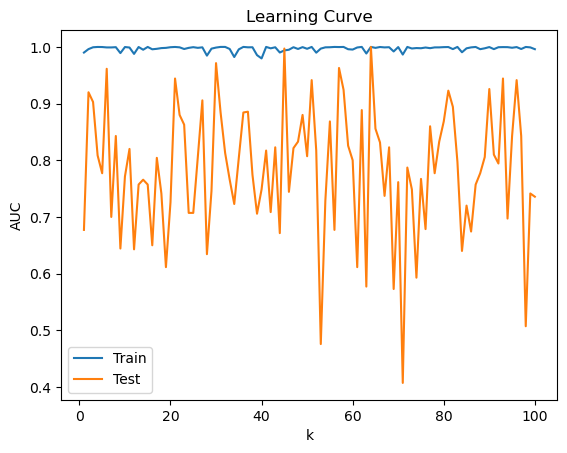

In [76]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(criterion='entropy',max_depth=8, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, splitter='best')
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

- param 51 and 64 (overfit)

In [77]:
dt_final = DecisionTreeClassifier(criterion='entropy',max_depth=8, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, splitter='best')
dt_final.fit(X_train, y_train)
y_pred_dt_final = dt_final.predict(X_test)

eval_classification(dt_final)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.98
Precision (Test Set): 0.96
Recall (Test Set): 0.96
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.94
roc_auc (train-proba): 1.00
accuracy (crossval train): 0.9858147229114971
accuracy (crossval test): 0.7373819163292848


In [83]:
print(dt_final.feature_importances_)

[0.         0.01928094 0.01049509 0.02705343 0.         0.
 0.01182056 0.         0.03669126 0.01333311 0.01887587 0.
 0.         0.01333311 0.         0.00217007 0.         0.00919627
 0.         0.00237259 0.         0.         0.08792764 0.01873069
 0.         0.03934686 0.01550395 0.36291278 0.         0.02614264
 0.         0.         0.05091578 0.10544779 0.11308701 0.01536256
 0.        ]


#### Random Forest Hyperparameter

In [69]:
from scipy.stats import randint, uniform

# List of hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

hyperparameters = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Initialize Model
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV instead of GridSearchCV for efficiency
rf_tuned = RandomizedSearchCV(
    estimator=rf,
    param_distributions=hyperparameters,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,  # Use all available cores
    scoring='precision'
)

# Fit the model
rf_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Check performance of the model
# Make sure you have defined the eval_classification function
eval_classification(rf_tuned)

print("Best parameters found: ", rf_tuned.best_params_)
print("Best precision score: ", rf_tuned.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; 

In [70]:
best_rf = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False,
    random_state=42  # for reproducibility
)

# 2. Train the model on the full training dataset
best_rf.fit(X_train, y_train)

# 3. Evaluate the model's performance on the test set
y_pred_best_rf = best_rf.predict(X_test)

eval_classification(best_rf)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Precision (Test Set): 0.93
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
accuracy (crossval train): 1.0
accuracy (crossval test): 0.9383265856950066


#### Pipeline

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train are your training data

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Define the parameter grid
param_grid = {
    'clf__max_depth': [3, 5, 7, 9],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__max_depth': 3, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}
0.9592929292929293


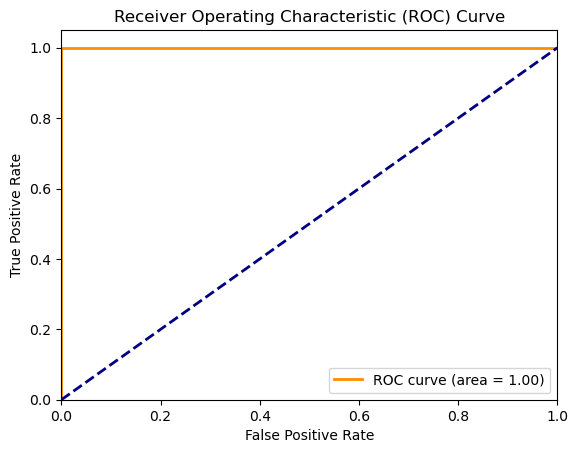

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = dt_final.predict_proba(X_test)

# Assuming you have y_true and y_score (predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Just use get_params() directly on your model
print(dt_final.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
